# Census analytics

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [3]:
census_df = pd.read_csv('census-income.csv')

In [4]:
census_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No missing data

In [6]:
census_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [17]:
census_df['annual_income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
census_df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
annual_income     32561
dtype: int64

In [19]:
census_df[census_df['annual_income'] == '>50K'].count()

age               7841
workclass         7841
fnlwgt            7841
education         7841
education-num     7841
marital-status    7841
occupation        7841
relationship      7841
race              7841
sex               7841
capital-gain      7841
capital-loss      7841
hours-per-week    7841
native-country    7841
annual_income     7841
dtype: int64

In [22]:
7841/32561

0.2408095574460244

In [24]:
census_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [30]:
census_df[(census_df['marital-status'] == 'Never-married') & (census_df['hours-per-week'] < 20)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
168,18,Private,25828,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,16,United-States,<=50K
178,18,Private,183930,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
209,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
262,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
280,22,Private,34918,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,Germany,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,18,Private,347336,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
32356,23,Private,133355,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,15,United-States,<=50K
32494,82,?,403910,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,3,United-States,<=50K
32524,26,Private,191648,Assoc-acdm,12,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,15,United-States,<=50K


In [32]:
census_df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [38]:
census_df.groupby('native-country').count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,annual_income
native-country,,,,,,,,,,,,,,
?,583,583,583,583,583,583,583,583,583,583,583,583,583,583
Cambodia,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Canada,121,121,121,121,121,121,121,121,121,121,121,121,121,121
China,75,75,75,75,75,75,75,75,75,75,75,75,75,75
Columbia,59,59,59,59,59,59,59,59,59,59,59,59,59,59
Cuba,95,95,95,95,95,95,95,95,95,95,95,95,95,95
Dominican-Republic,70,70,70,70,70,70,70,70,70,70,70,70,70,70
Ecuador,28,28,28,28,28,28,28,28,28,28,28,28,28,28
El-Salvador,106,106,106,106,106,106,106,106,106,106,106,106,106,106


In [8]:
census_df[(census_df['workclass'] == 'Private') & (census_df['native-country'] != 'United-States') & (census_df['native-country'] != '?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
35,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32508,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


In [39]:
census_df[(census_df['annual_income'] == '<=50K') | (census_df['hours-per-week'] > 40)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [40]:
census_df[(census_df['hours-per-week'] > 40)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


### annual income vs age

In [41]:
sel_ai = census_df['annual_income']== '<=50K'

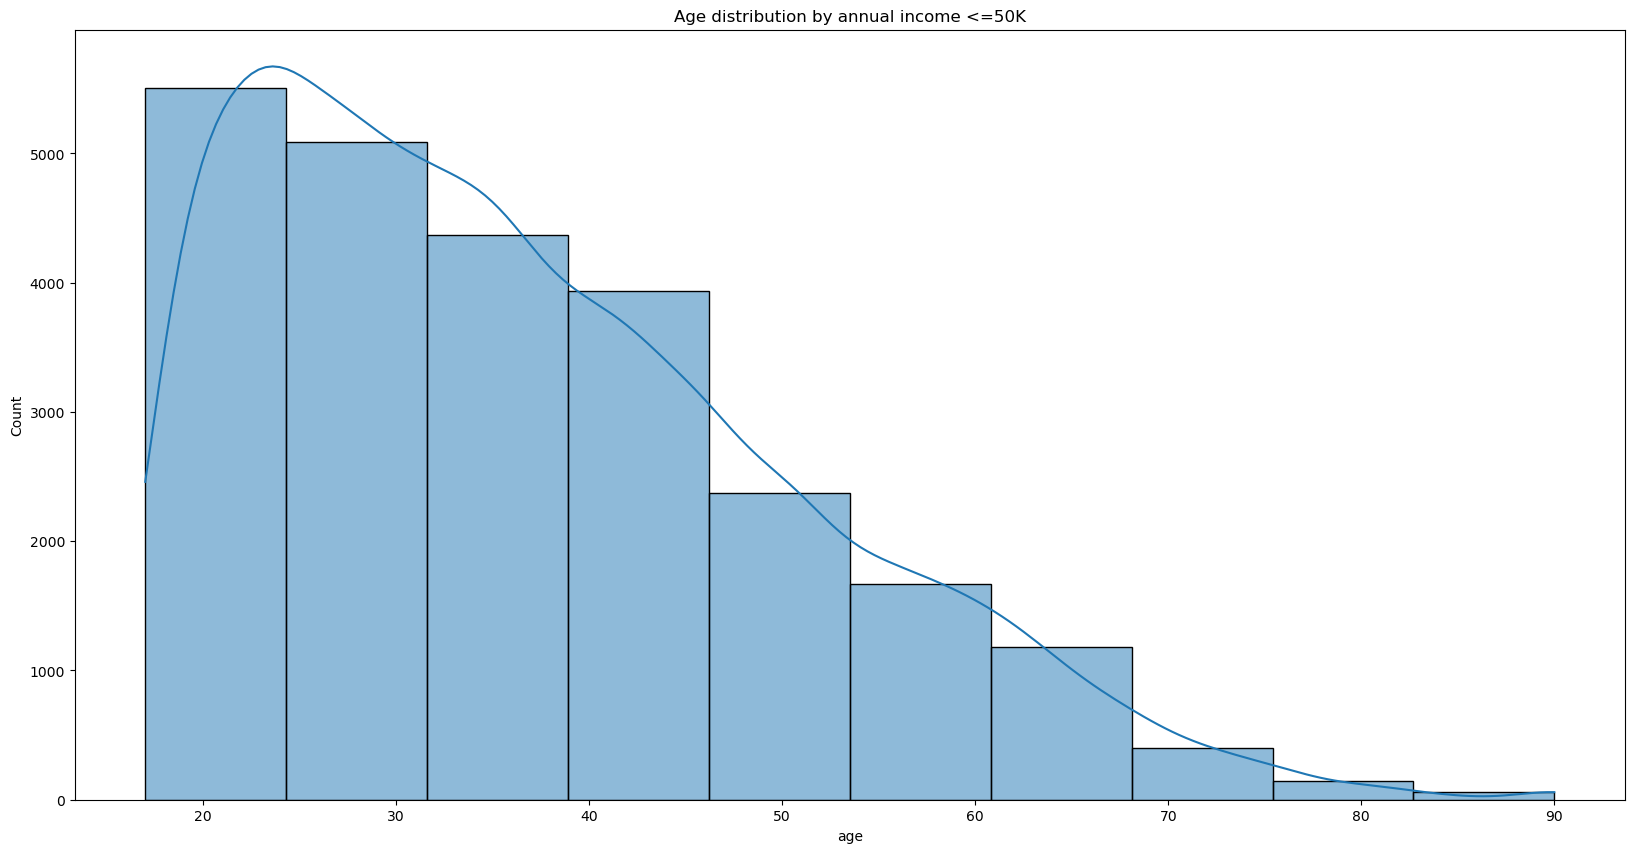

In [42]:
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['age'], bins=10, kde=True)
plt.title('Age distribution by annual income <=50K')
plt.show()

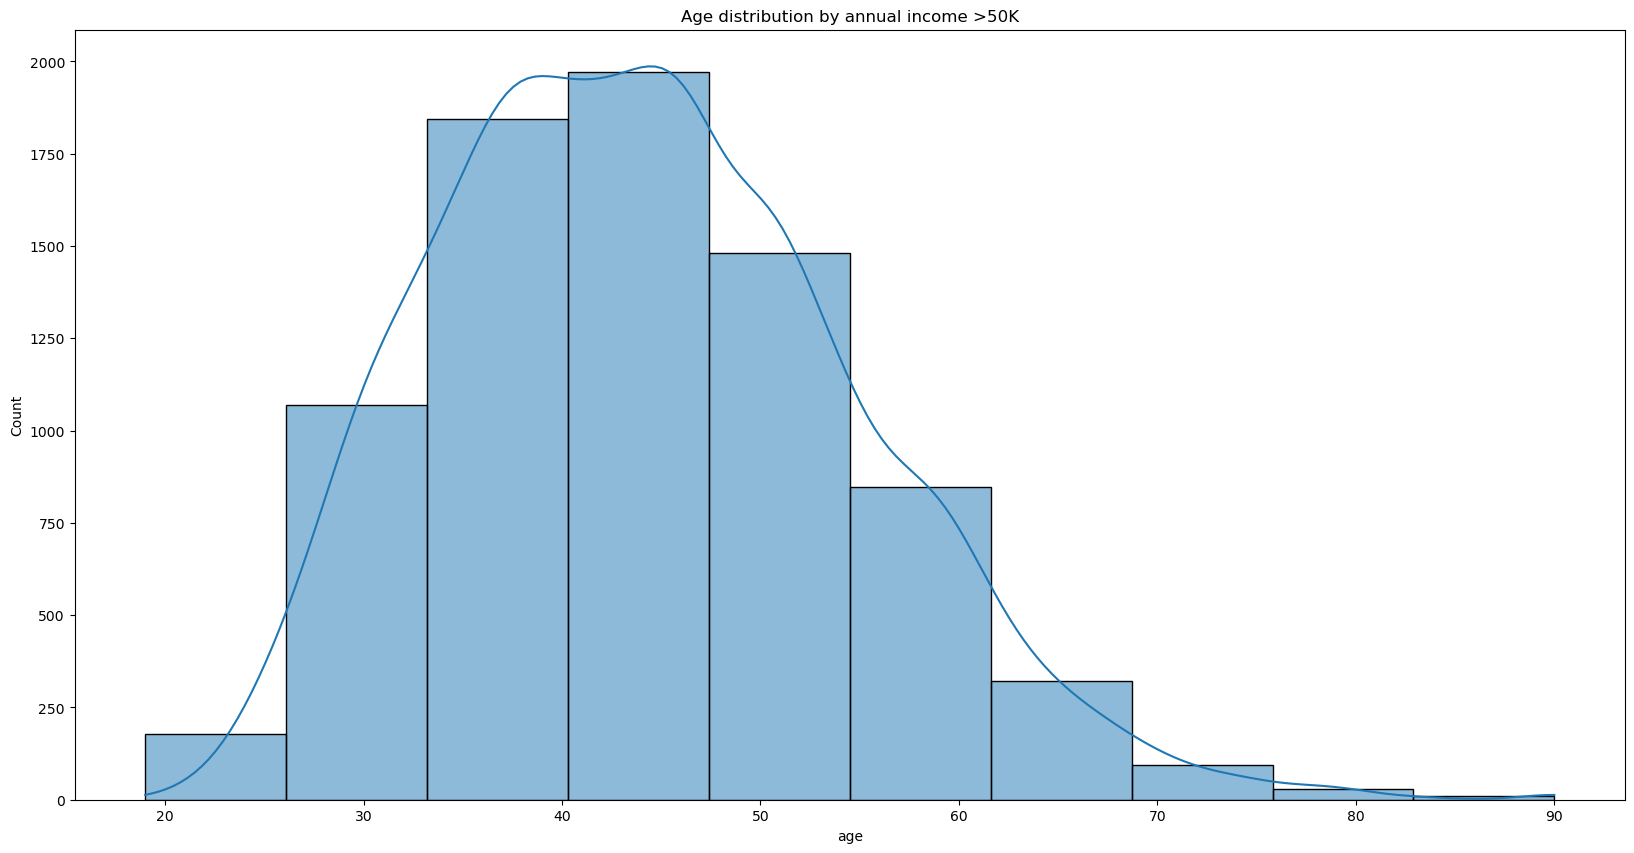

In [43]:
sel_ai = census_df['annual_income']== '>50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['age'], bins=10, kde=True)
plt.title('Age distribution by annual income >50K')
plt.show()

### annual income vs occupation

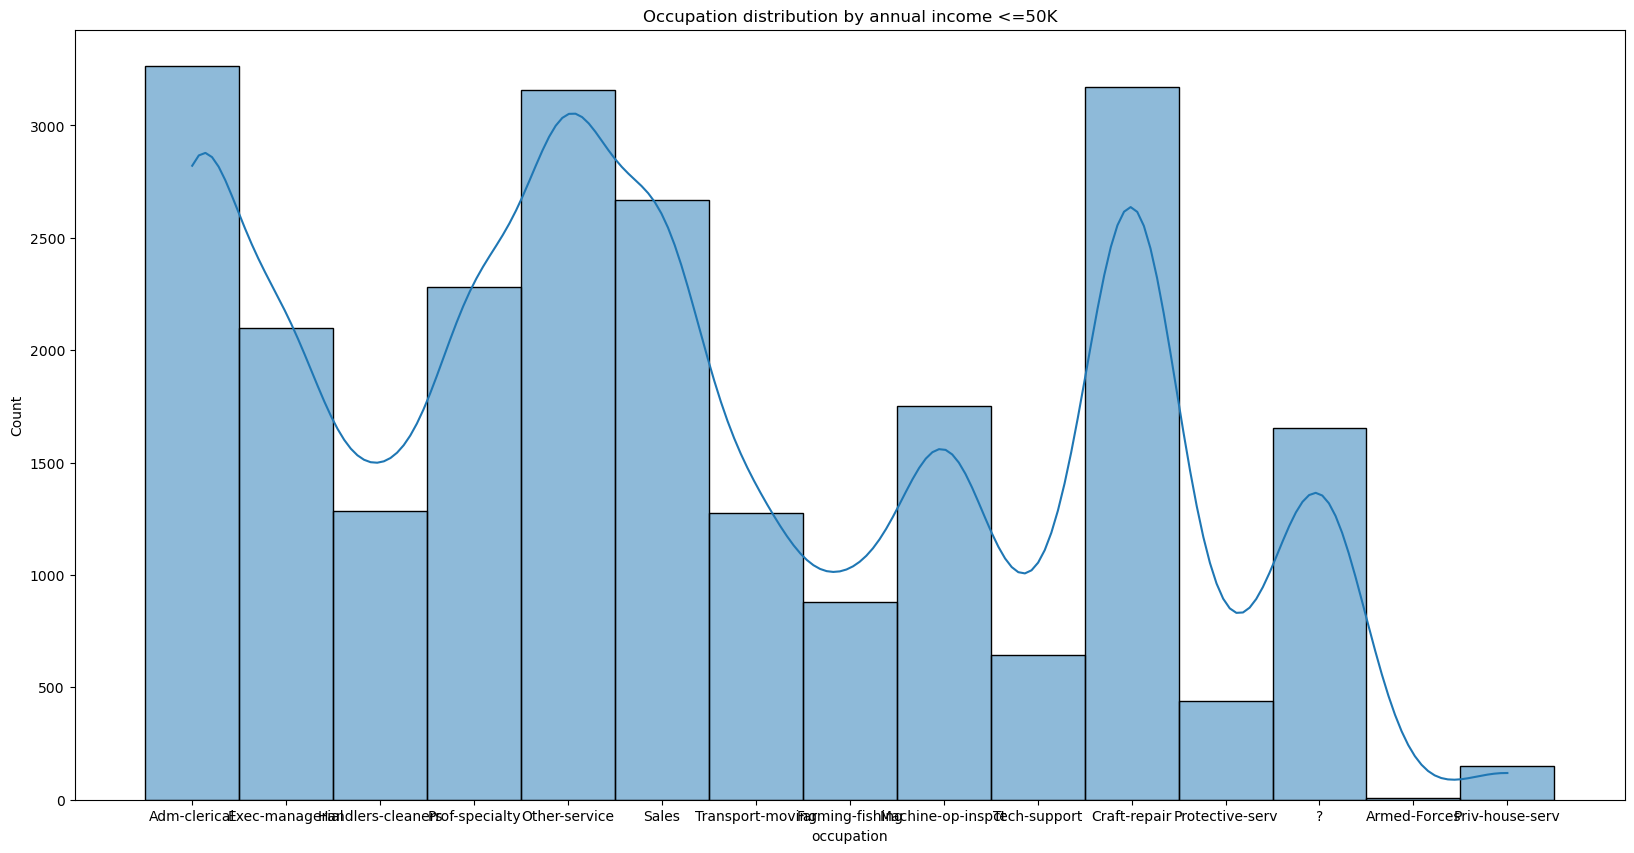

In [44]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['occupation'], bins=20, kde=True)
plt.title('Occupation distribution by annual income <=50K')
plt.show()

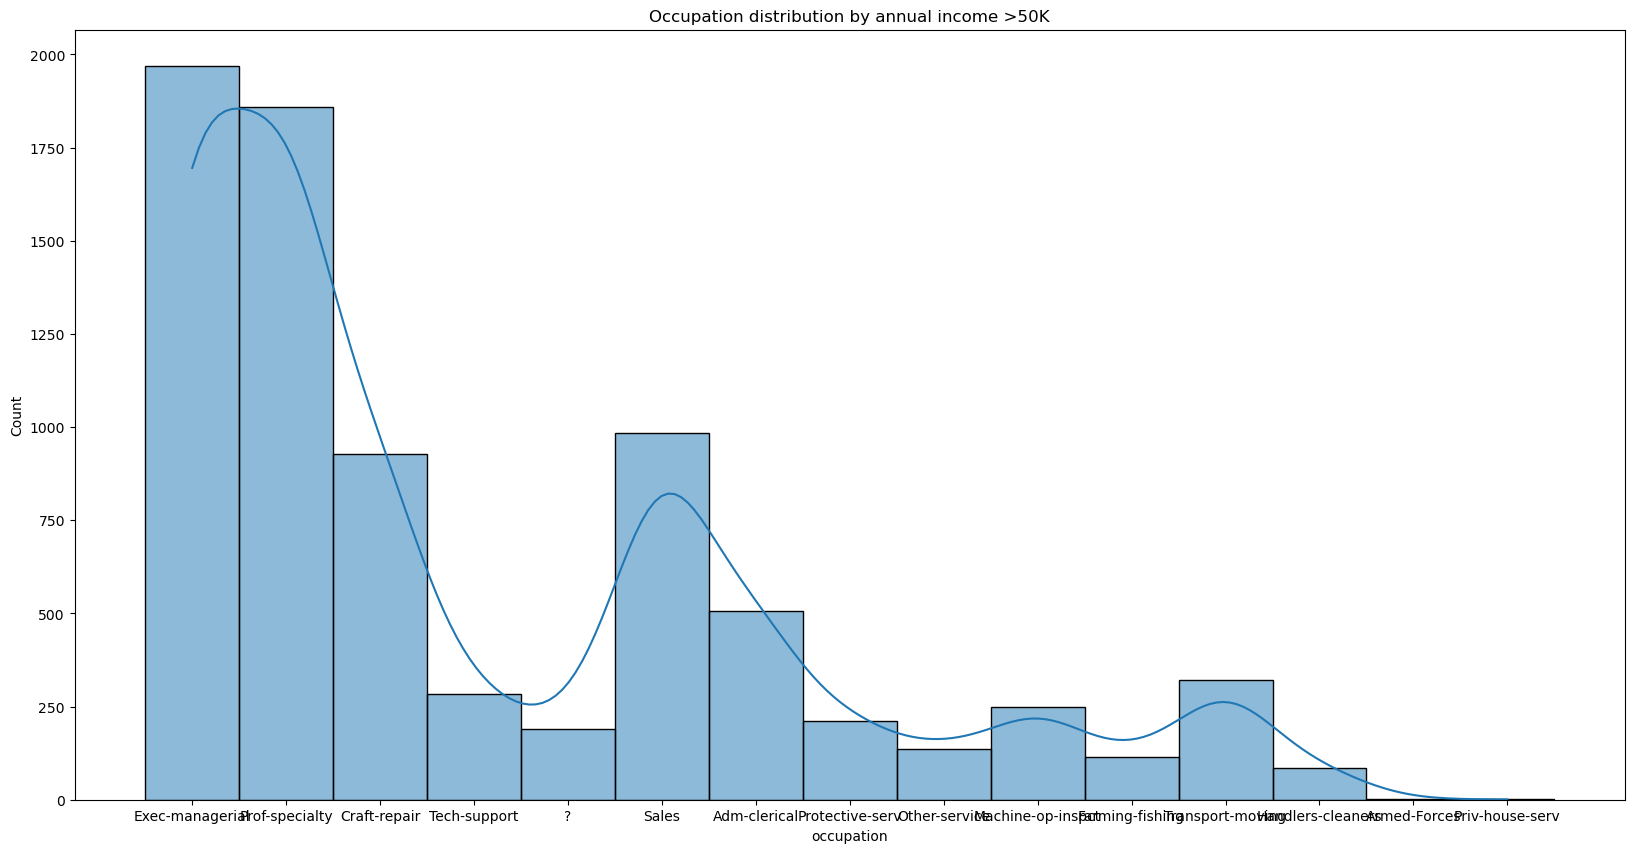

In [45]:
sel_ai = census_df['annual_income']== '>50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['occupation'], bins=20, kde=True)
plt.title('Occupation distribution by annual income >50K')
plt.show()

In [46]:
census_df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [47]:
len(census_df['occupation'].unique())

15

In [48]:
census_df[(census_df['occupation'] == 'Tech-support') & (census_df['annual_income'] == '>50K')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
248,40,Private,207578,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,>50K
357,40,Private,96129,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
469,30,Private,118551,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31510,42,Private,111483,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
31653,25,Private,189656,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,60,United-States,>50K
31807,51,Self-emp-not-inc,170086,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
32076,59,Federal-gov,293971,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [49]:
ts = census_df[(census_df['occupation'] == 'Tech-support')]
ts

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
42,24,Private,172987,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,<=50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
64,29,Private,105598,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,58,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32396,56,Private,135458,HS-grad,9,Divorced,Tech-support,Not-in-family,Black,Female,0,0,40,United-States,<=50K
32457,33,Private,139057,Masters,14,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [50]:
ts[ts['annual_income'] == '>50K']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
55,43,Private,237993,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
248,40,Private,207578,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,>50K
357,40,Private,96129,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
469,30,Private,118551,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31510,42,Private,111483,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
31653,25,Private,189656,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,60,United-States,>50K
31807,51,Self-emp-not-inc,170086,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
32076,59,Federal-gov,293971,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


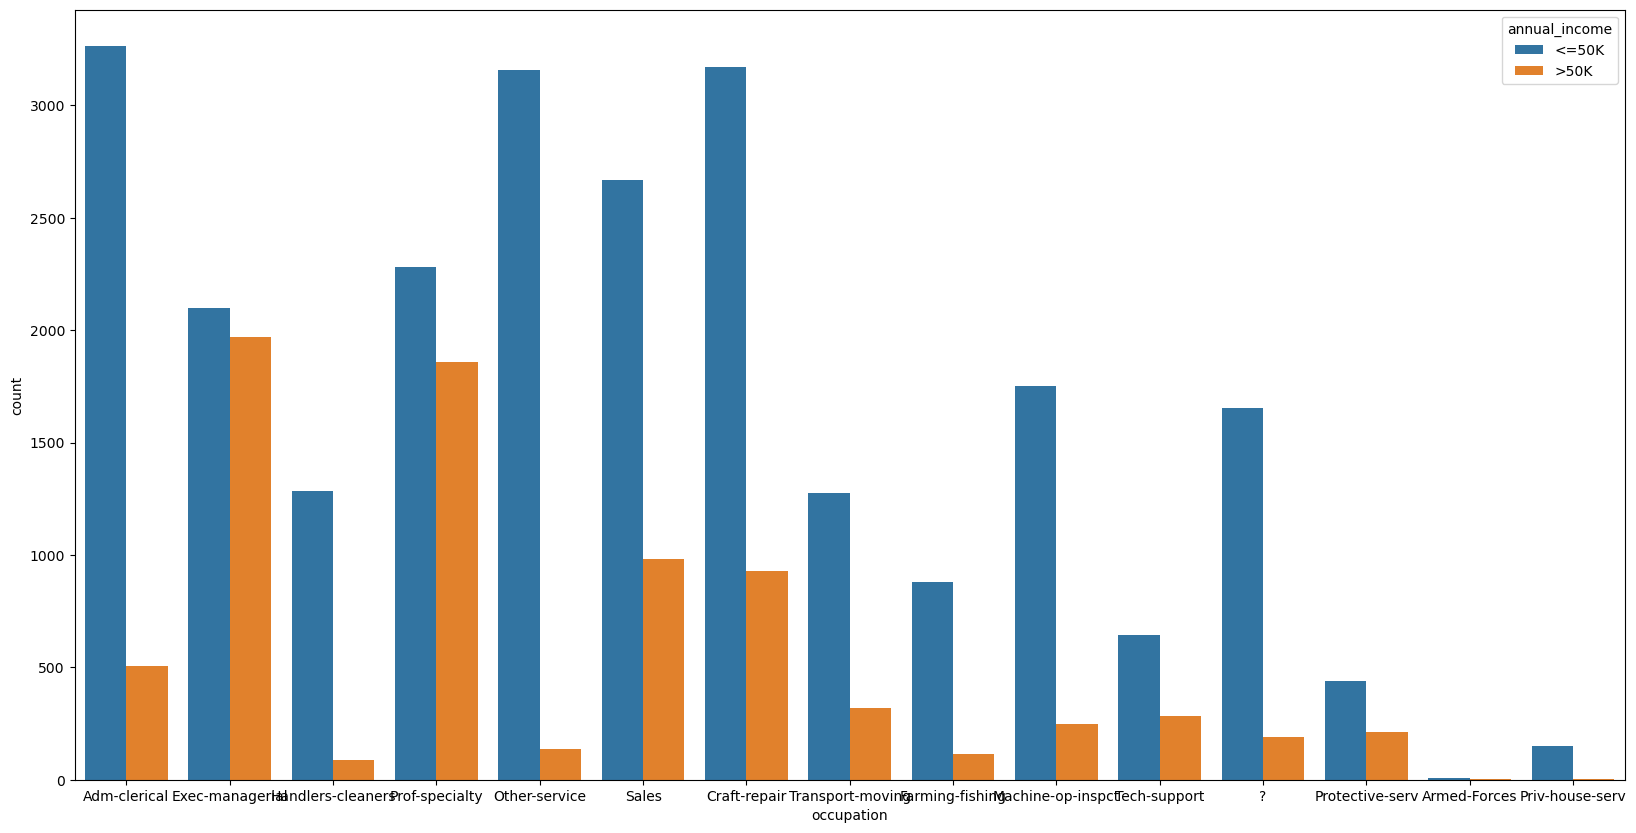

In [51]:
plt.subplots(figsize=(20,10))
sns.countplot(x='occupation', hue='annual_income', data=census_df)
plt.show()

In [52]:
census_df[census_df['occupation'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


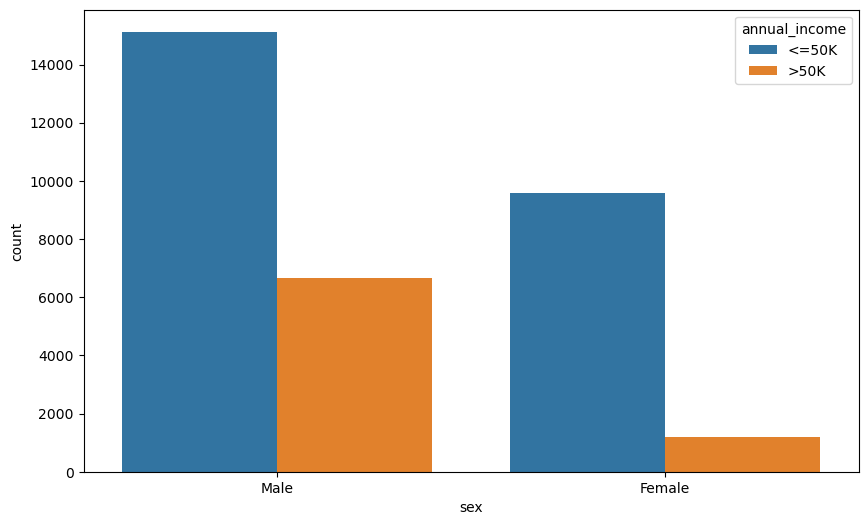

In [53]:
plt.subplots(figsize=(10,6))
sns.countplot(x='sex', hue='annual_income', data=census_df)
plt.show()

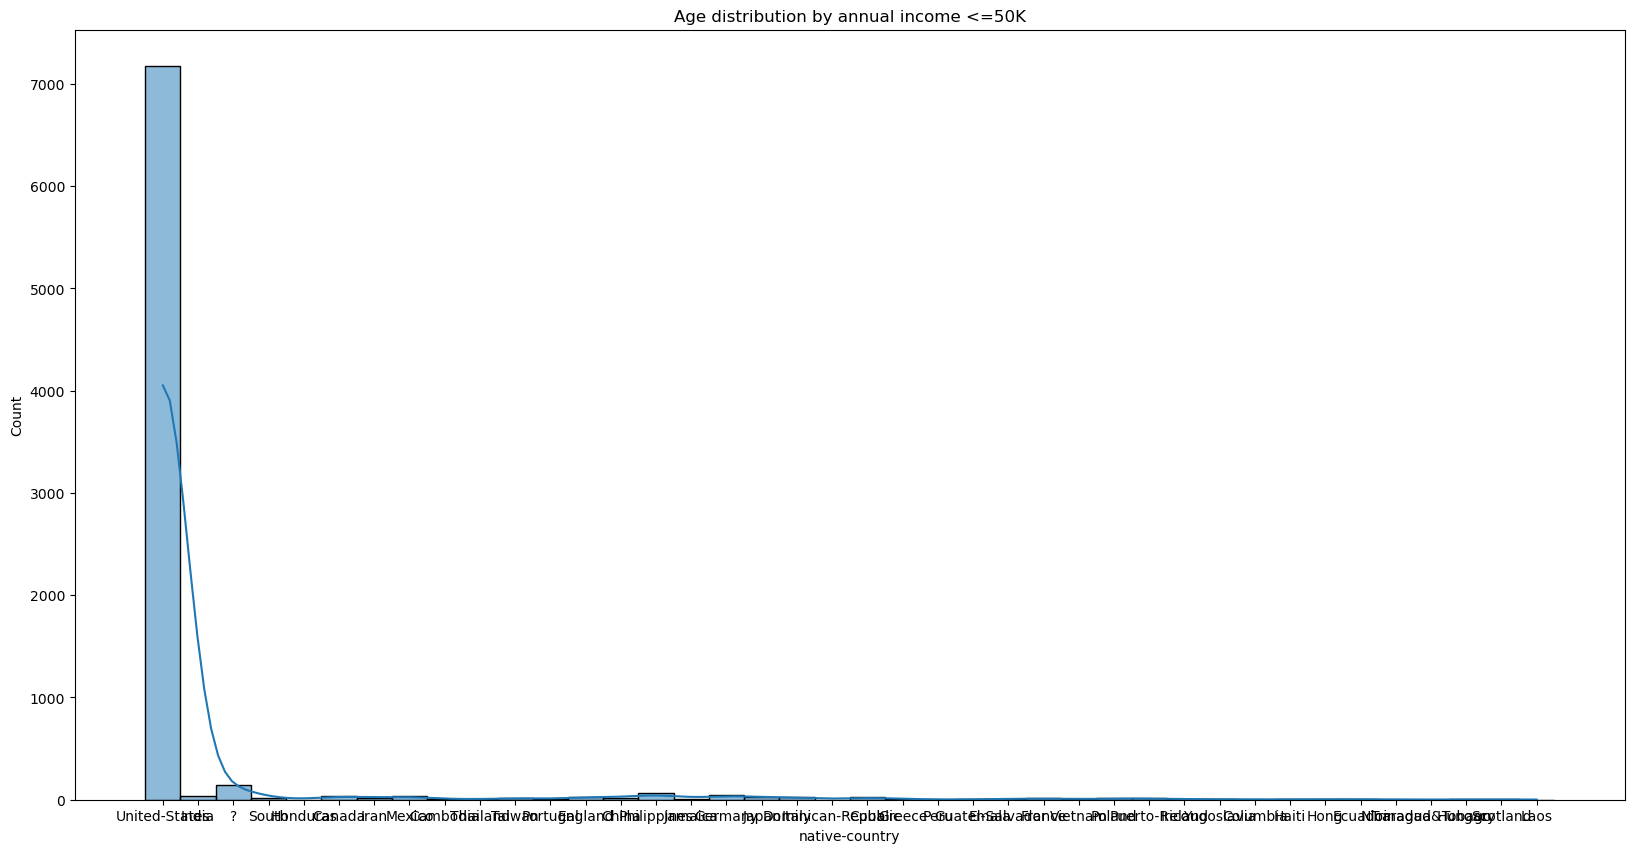

In [54]:
sel_ai = census_df['annual_income']== '>50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['native-country'], bins=10, kde=True)
plt.title('Age distribution by annual income <=50K')
plt.show()

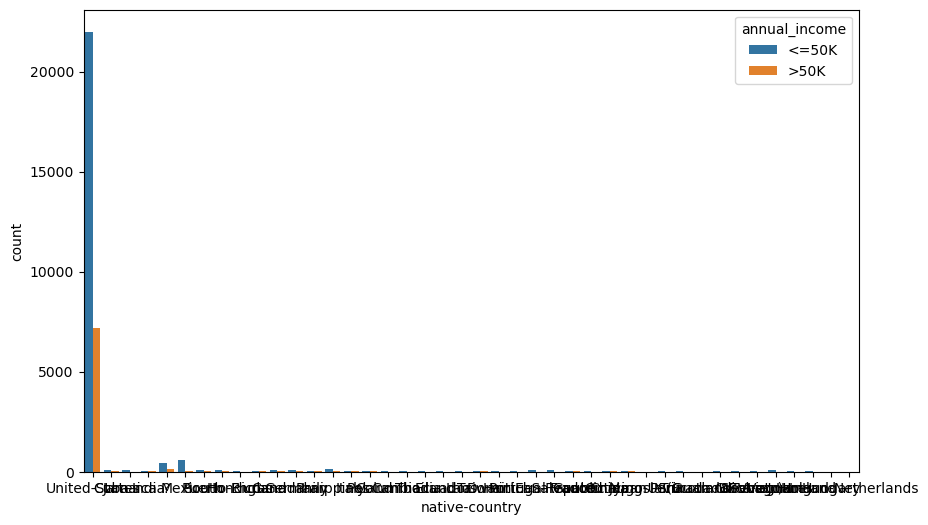

In [55]:
plt.subplots(figsize=(10,6))
sns.countplot(x='native-country', hue='annual_income', data=census_df)
plt.show()

In [56]:
census_df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

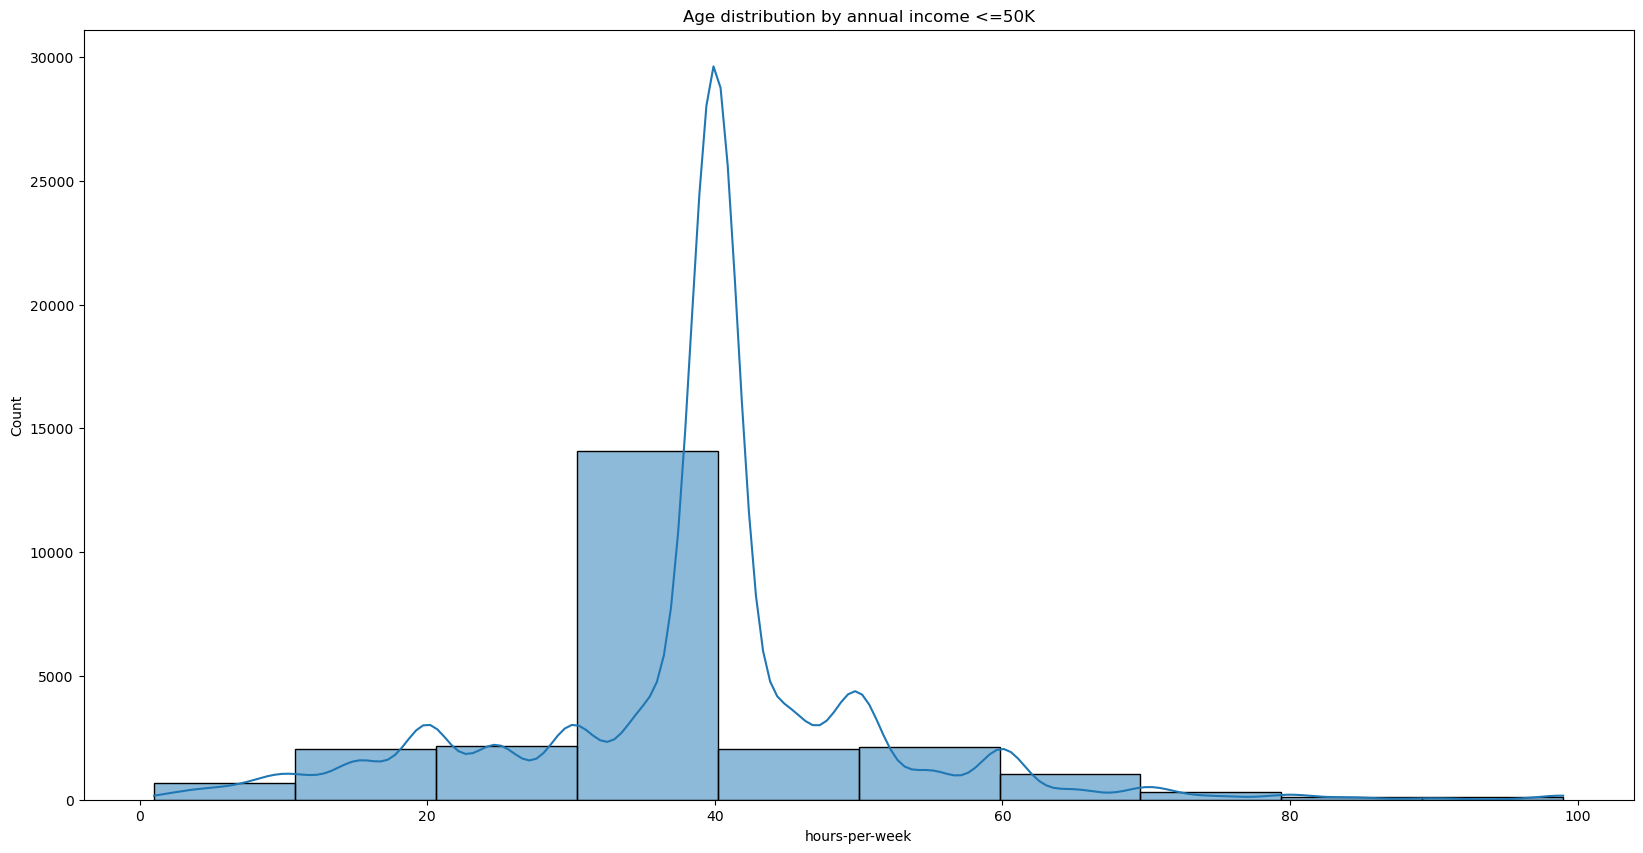

In [57]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['hours-per-week'], bins=10, kde=True)
plt.title('Age distribution by annual income <=50K')
plt.show()

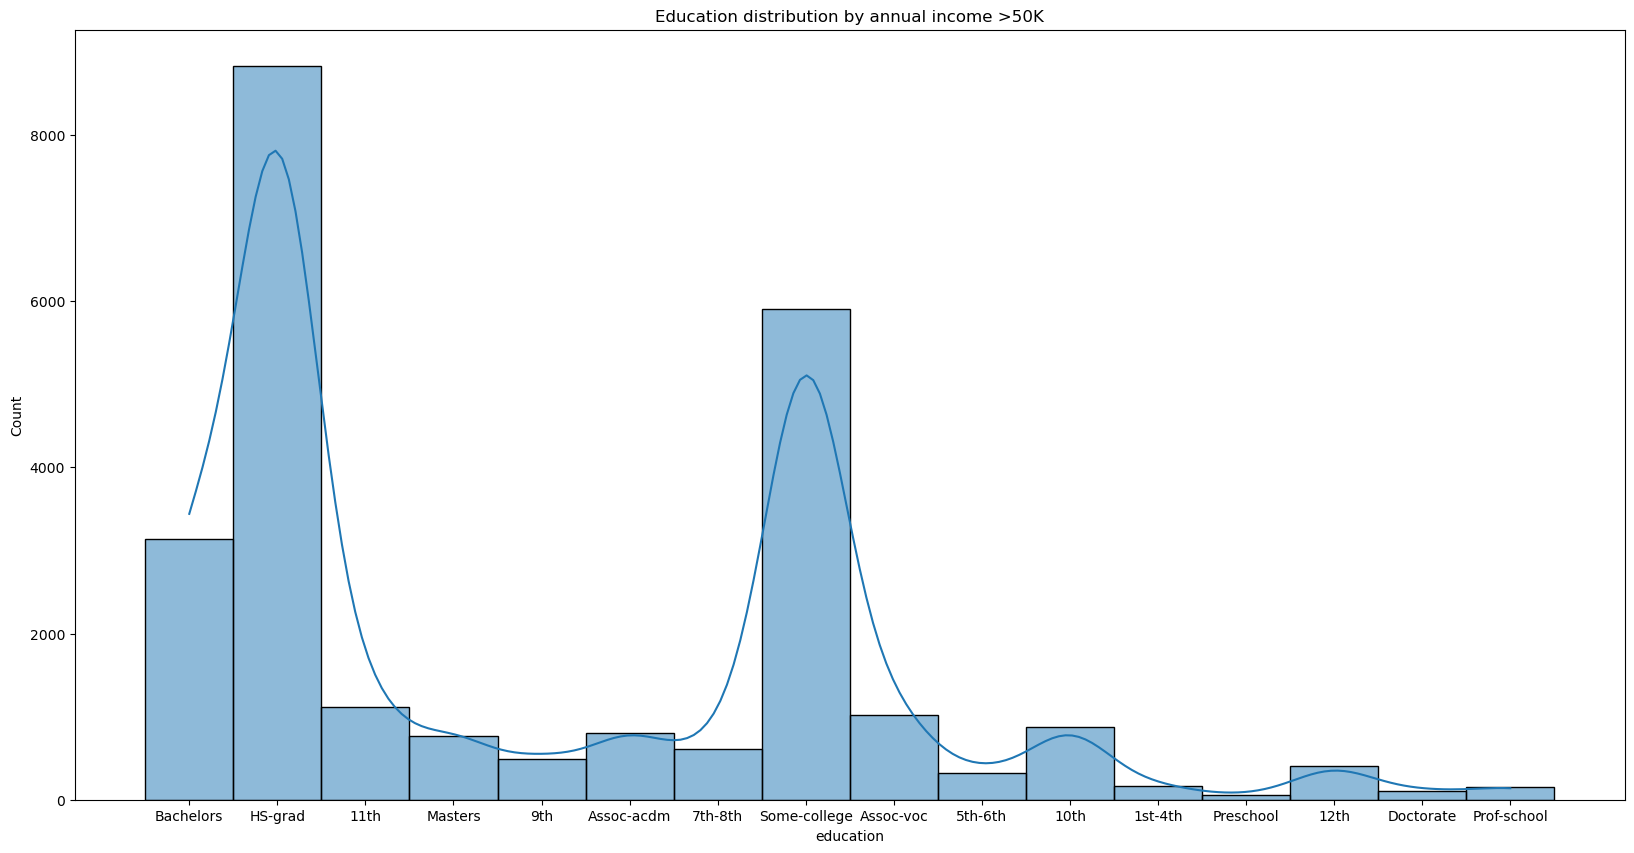

In [58]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['education'], bins=20, kde=True)
plt.title('Education distribution by annual income >50K')
plt.show()

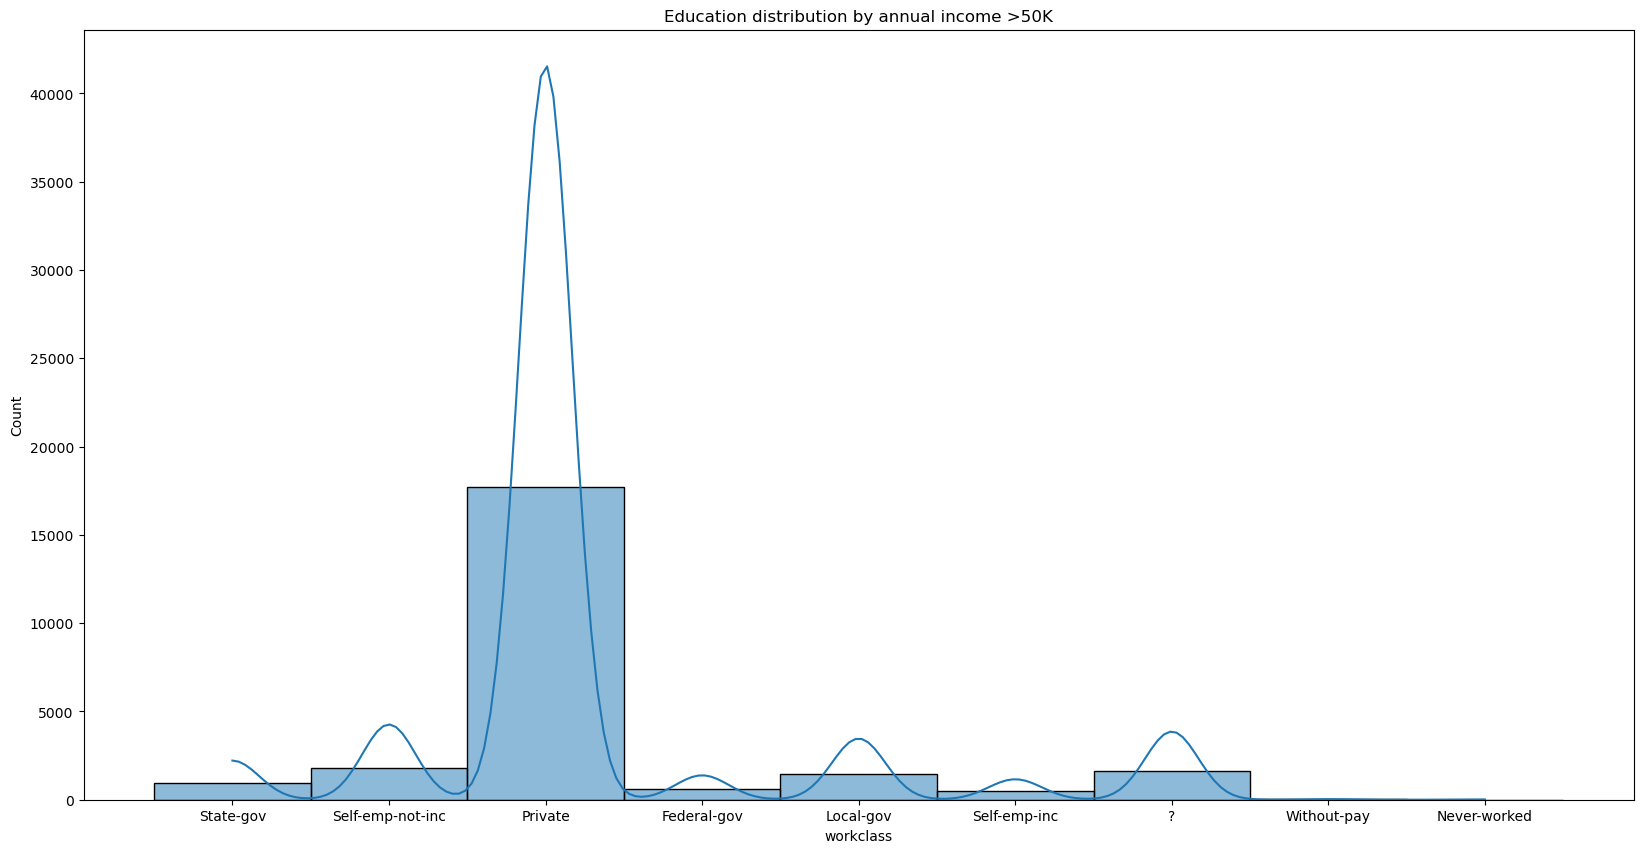

In [59]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['workclass'], bins=20, kde=True)
plt.title('Education distribution by annual income >50K')
plt.show()

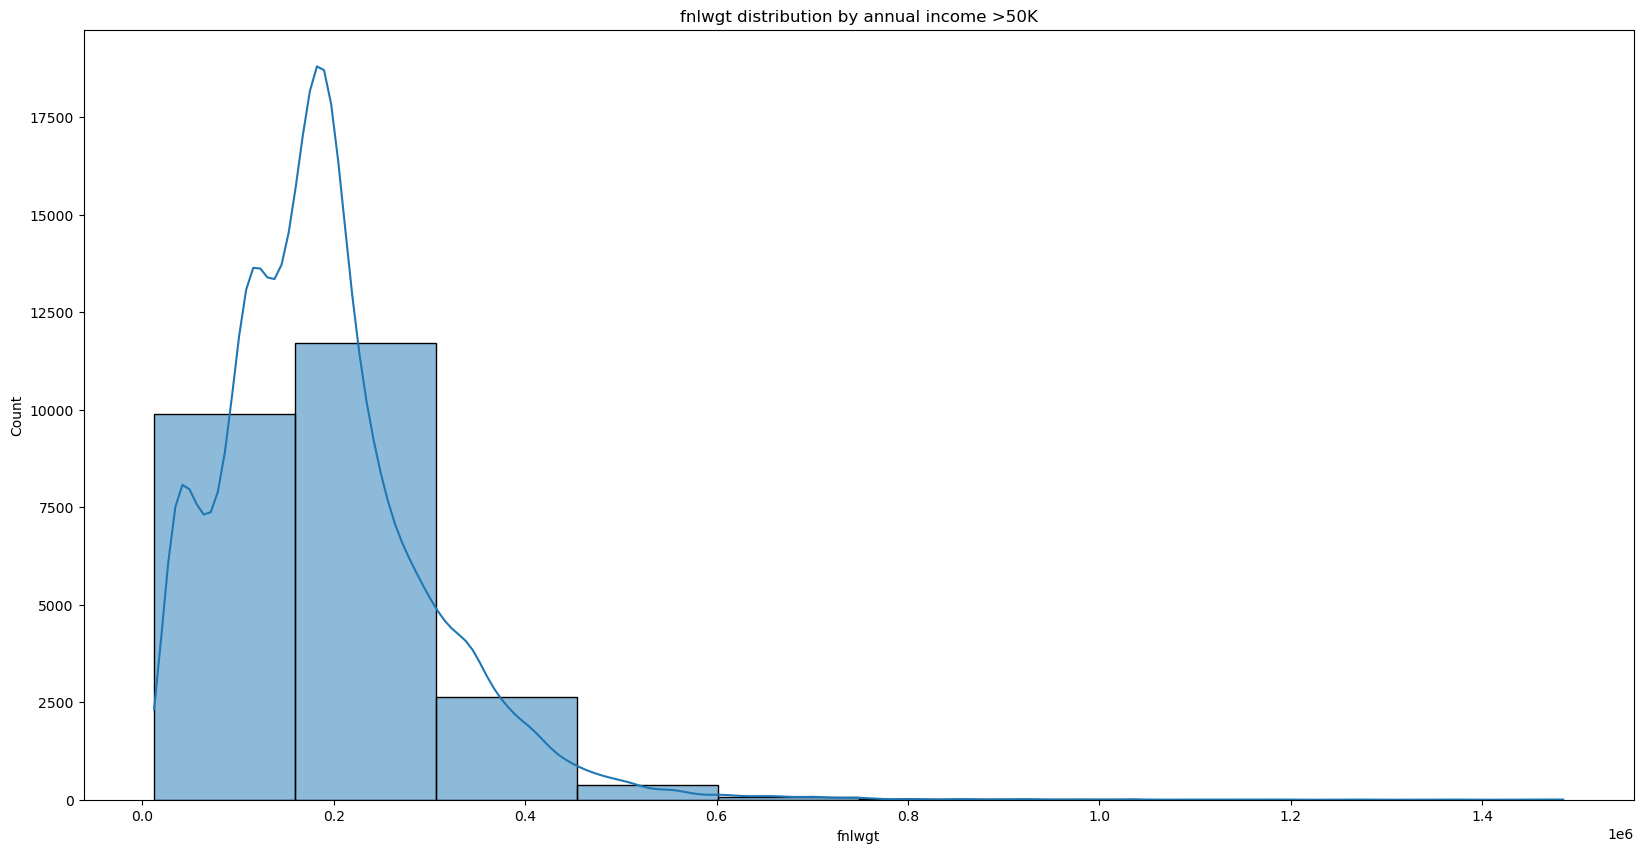

In [60]:
sel_ai = census_df['annual_income']== '<=50K'
plt.subplots(figsize = (20,10))
sns.histplot(census_df[sel_ai]['fnlwgt'], bins=10, kde=True)
plt.title('fnlwgt distribution by annual income >50K')
plt.show()

In [61]:
census_df[census_df['capital-gain'] > 0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K


In [62]:
census_df[census_df['capital-loss'] > 0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32441,53,Private,304504,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,45,United-States,>50K
32443,18,Private,41381,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,1602,20,United-States,<=50K
32445,61,Private,190682,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,1669,50,United-States,<=50K
32458,36,Private,237943,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K


#### Drop unwanted columns

In [63]:
census_df.drop(['fnlwgt','capital-gain', 'capital-loss', 'marital-status', 'relationship', 'workclass'], axis=1, inplace=True)

In [64]:
census_df.columns

Index(['age', 'education', 'education-num', 'occupation', 'race', 'sex',
       'hours-per-week', 'native-country', 'annual_income'],
      dtype='object')

In [65]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   occupation      32561 non-null  object
 4   race            32561 non-null  object
 5   sex             32561 non-null  object
 6   hours-per-week  32561 non-null  int64 
 7   native-country  32561 non-null  object
 8   annual_income   32561 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [66]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

In [67]:
census_df_final = census_df

In [68]:
#del census_df_final

In [69]:
for col in ['education', 'occupation', 'race', 'sex', 'native-country']:
    census_df_final = create_encoding(census_df_final, col)

In [70]:
census_df.sample(5)

,age,education,education-num,occupation,race,sex,hours-per-week,native-country,annual_income
1390,27,Bachelors,13,Tech-support,White,Female,40,United-States,<=50K
17509,36,HS-grad,9,Machine-op-inspct,White,Male,56,United-States,<=50K
3399,53,HS-grad,9,Transport-moving,Black,Male,60,United-States,<=50K
28100,58,Some-college,10,Sales,White,Male,12,United-States,<=50K
24310,43,HS-grad,9,Exec-managerial,White,Female,40,United-States,<=50K


In [71]:
census_df_final.drop( ['education', 'occupation', 'race', 'sex', 'native-country'], axis=1, inplace=True)

In [72]:
census_df_final.head(10)

,age,education-num,hours-per-week,annual_income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,<=50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,<=50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,<=50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,<=50K,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,<=50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,40,<=50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,5,16,<=50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9,45,>50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,14,50,>50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,13,40,>50K,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
census_df_final['annual_income']= label_encoder.fit_transform(census_df_final['annual_income']) 
  
census_df_final['annual_income'].unique() 

array([0, 1])

In [74]:
census_df_final.head(10)

,age,education-num,hours-per-week,annual_income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,5,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9,45,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,14,50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,13,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Create train and validation sets

In [75]:
census_df_final.columns

Index(['age', 'education-num', 'hours-per-week', 'annual_income',
       'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Oth

In [76]:
input_vars = ['age', 'education-num', 'hours-per-week', 
       'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Female', 'sex_Male', 'native-country_?', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Holand-Netherlands',
       'native-country_Honduras', 'native-country_Hong',
       'native-country_Hungary', 'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia']

In [77]:
X = census_df_final[input_vars]

In [78]:
X.sample(2)

,age,education-num,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
11290,39,10,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12098,35,9,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
y = census_df_final['annual_income']

In [80]:
census_df_final

,age,education-num,hours-per-week,annual_income,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
y.sample(2)

1306     0
22800    1
Name: annual_income, dtype: int32

In [82]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.20, random_state=0)

In [83]:
train_X.shape, val_X.shape

((26048, 83), (6513, 83))

In [84]:
len(X)

32561

In [85]:
26048/32561*100

79.99754307300144

### Training the model

In [86]:
log_reg_model_1 = LogisticRegression()

In [87]:
log_reg_model_1

LogisticRegression()

In [88]:
log_reg_model_1.fit(train_X, train_y)

C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Validating the model

In [89]:
pred_values = log_reg_model_1.predict(val_X)

In [90]:
pred_values

array([0, 0, 0, ..., 1, 0, 0])

### Calcuate the performance metrics of the model

In [91]:
acc = accuracy_score(val_y, pred_values)

In [92]:
print('Accuracy of the model is: ', acc*100)

Accuracy of the model is:  80.82296944572394


In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(val_y, pred_values, average="macro"))
print(precision_score(val_y, pred_values, average="macro"))
print(recall_score(val_y, pred_values, average="macro"))

0.7005140537817574
0.7522167187712188
0.6789974388752978


### Plot the confusion matrix using heatmap

#### To calculate the confusion matrix

In [94]:
cm = confusion_matrix(val_y, pred_values)  # predicted vs actual

In [95]:
cm

array([[4585,  333],
       [ 916,  679]], dtype=int64)

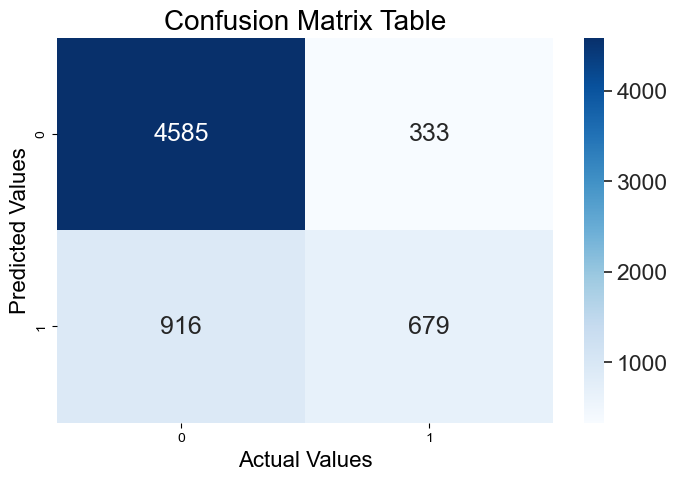

In [96]:
plt.subplots(figsize=(8, 5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Table', fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.show()

In [97]:
(4602+652)/(4602+652+934+325)*100

80.66943037002918

# Airport_Passengers_Satisfication Data Analytics

In [108]:
df = pd.read_csv('Airport_Passengers_Satisfication.csv')
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [104]:
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [109]:
df[(df['Gender'] == 'Female') & (df['satisfaction'] == 'dissatisfied')]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
11,115550,Female,Loyal Customer,33,Business travel,Business,325,2,5,5,...,2,2,2,2,3,2,4,18,7.0,dissatisfied
16,124915,Female,Loyal Customer,31,Business travel,Eco,728,2,5,5,...,2,4,3,3,4,3,2,2,0.0,dissatisfied
18,76872,Female,Loyal Customer,43,Personal Travel,Eco,1927,3,4,3,...,5,5,3,5,4,5,3,0,0.0,dissatisfied
24,82602,Female,disloyal Customer,30,Business travel,Eco,528,4,3,5,...,2,3,2,3,4,4,2,0,0.0,dissatisfied
38,70990,Female,disloyal Customer,32,Business travel,Business,802,4,4,4,...,2,4,2,4,3,5,2,0,10.0,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25965,15949,Female,Loyal Customer,51,Personal Travel,Eco,528,4,4,4,...,5,5,4,5,4,5,4,0,0.0,dissatisfied
25967,90347,Female,disloyal Customer,39,Business travel,Business,404,1,1,1,...,2,5,3,4,4,4,2,0,0.0,dissatisfied
25970,25309,Female,disloyal Customer,36,Business travel,Eco,432,1,5,1,...,4,5,2,5,2,3,4,0,0.0,dissatisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,dissatisfied


In [110]:
7437/25976 

0.2863027409916846

In [100]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

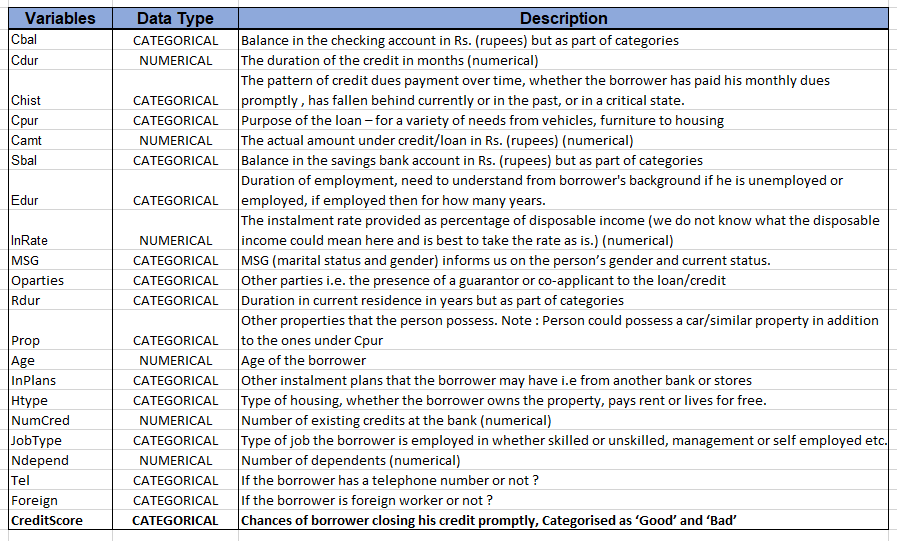

In [79]:
credit_df['Cbal'].unique()

NameError: name 'credit_df' is not defined

In [80]:
credit_df['Chist'].unique()

NameError: name 'credit_df' is not defined

In [74]:
credit_df['Cpur'].unique()

array(['Business', 'electronics', 'renovation', 'second hand vehicle',
       'education', 'new vehicle', 'miscellaneous', 'furniture',
       'retaining', 'domestic needs'], dtype=object)

In [75]:
credit_df['Sbal'].unique()

array(['Rs. < 1000', 'no savings account', 'Rs. >= 10000',
       '5000 <= Rs. < 10000', '1000 <= Rs. < 5000'], dtype=object)

In [76]:
credit_df['Edur'].unique()

array(['1 to 4 years', 'more than 7 years', 'less than 1 year',
       '4 to 7 years', 'not employed'], dtype=object)

In [77]:
credit_df['MSG'].unique()

array(['married or widowed male', 'single male',
       'divorced or separated or married female',
       'divorced or separated male'], dtype=object)

In [78]:
credit_df['Oparties'].unique()

array(['no one', 'yes|guarantor', 'yes|co-applicant'], dtype=object)

In [79]:
credit_df['Prop'].unique()

array(['real estate', 'Unknown', 'Other cars etc.',
       'life insurance/building society'], dtype=object)

In [80]:
credit_df['inPlans'].unique()

array(['bank', 'none', 'stores'], dtype=object)

In [81]:
credit_df['Htype'].unique()

array(['own', 'free', 'pays rent'], dtype=object)

In [82]:
credit_df['JobType'].unique()

array(['employee with official position',
       'employed either in management|self or in high position',
       'resident unskilled',
       'non resident either unemployed or  unskilled '], dtype=object)

In [83]:
credit_df['telephone'].unique()

array(['yes', 'no'], dtype=object)

In [84]:
credit_df['foreign'].unique()

array(['no', 'yes'], dtype=object)

In [85]:
credit_df['creditScore'].unique()

array(['good', 'bad'], dtype=object)

In [86]:
credit_df.isna().sum()

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

In [87]:
credit_df.drop(['Cbal', 'Sbal', 'telephone'], axis=1, inplace=True)

In [88]:
credit_df_final = credit_df

In [89]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
credit_df_final['Chist']= label_encoder.fit_transform(credit_df_final['Chist']) 
  
credit_df_final['Chist'].unique() 

array([1, 2, 3, 0])

In [90]:
credit_df.sample(2)

,Cdur,Chist,Cpur,Camt,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,foreign,creditScore
747,12,2,electronics,9180,more than 7 years,4,single male,no one,more than 3 years,real estate,65,none,own,4,employee with official position,1,no,good
406,24,1,electronics,16470,less than 1 year,4,divorced or separated or married female,no one,1 to 2 years,Other cars etc.,29,none,pays rent,1,resident unskilled,1,no,bad


In [91]:
credit_df_final.sample(2)

,Cdur,Chist,Cpur,Camt,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,foreign,creditScore
870,24,1,furniture,17350,less than 1 year,4,single male,yes|co-applicant,less than a year,life insurance/building society,24,none,own,1,resident unskilled,1,yes,good
14,36,1,education,19650,more than 7 years,4,single male,no one,more than 3 years,Unknown,40,none,own,1,employed either in management|self or in high ...,1,no,bad


In [92]:
credit_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cdur         1000 non-null   int64 
 1   Chist        1000 non-null   int32 
 2   Cpur         1000 non-null   object
 3   Camt         1000 non-null   int64 
 4   Edur         1000 non-null   object
 5   InRate       1000 non-null   int64 
 6   MSG          1000 non-null   object
 7   Oparties     1000 non-null   object
 8   Rdur         1000 non-null   object
 9   Prop         1000 non-null   object
 10  age          1000 non-null   int64 
 11  inPlans      1000 non-null   object
 12  Htype        1000 non-null   object
 13  NumCred      1000 non-null   int64 
 14  JobType      1000 non-null   object
 15  Ndepend      1000 non-null   int64 
 16  foreign      1000 non-null   object
 17  creditScore  1000 non-null   object
dtypes: int32(1), int64(6), object(11)
memory usage: 136.8+ KB


In [93]:
credit_df_final.columns

Index(['Cdur', 'Chist', 'Cpur', 'Camt', 'Edur', 'InRate', 'MSG', 'Oparties',
       'Rdur', 'Prop', 'age', 'inPlans', 'Htype', 'NumCred', 'JobType',
       'Ndepend', 'foreign', 'creditScore'],
      dtype='object')

### Encoding Categorical Variables

In [94]:
for col in ['Cpur', 'Edur', 'MSG', 'Oparties', 'Rdur', 'Prop', 'inPlans', 'Htype', 'JobType', 'foreign', 'creditScore']:
    credit_df_final = create_encoding(credit_df_final, col)

In [95]:
credit_df_final.head(10)

,Cdur,Chist,Cpur,Camt,Edur,InRate,MSG,Oparties,Rdur,Prop,...,Htype_own,Htype_pays rent,JobType_employed either in management|self or in high position,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,foreign_no,foreign_yes,creditScore_bad,creditScore_good
0,9,1,Business,13790,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,...,1,0,0,1,0,0,1,0,0,1
1,15,2,electronics,15250,more than 7 years,4,single male,yes|guarantor,more than 3 years,real estate,...,1,0,0,1,0,0,1,0,0,1
2,36,3,Business,19410,more than 7 years,4,single male,no one,more than 3 years,Unknown,...,0,0,1,0,0,0,1,0,1,0
3,48,3,Business,144090,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,...,1,0,0,1,0,0,1,0,1,0
4,24,1,electronics,31690,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,...,1,0,0,1,0,0,1,0,0,1
5,27,1,renovation,51780,more than 7 years,4,single male,no one,more than 3 years,life insurance/building society,...,1,0,0,1,0,0,1,0,0,1
6,12,1,electronics,21590,less than 1 year,2,divorced or separated or married female,no one,1 to 2 years,Other cars etc.,...,1,0,0,1,0,0,1,0,0,1
7,12,1,second hand vehicle,9950,1 to 4 years,4,married or widowed male,no one,less than a year,real estate,...,1,0,0,1,0,0,1,0,0,1
8,36,1,education,18070,1 to 4 years,4,single male,no one,more than 3 years,Unknown,...,0,0,0,1,0,0,1,0,1,0
9,36,1,electronics,23820,1 to 4 years,4,divorced or separated or married female,no one,more than 3 years,Other cars etc.,...,1,0,0,1,0,0,1,0,0,1


In [96]:
credit_df_final.drop(['Cpur', 'Edur', 'MSG', 'Oparties', 'Rdur', 'Prop', 'inPlans', 'Htype', 'JobType', 'foreign', 'creditScore'], axis=1, inplace=True)

In [97]:
credit_df_final.head(10)

,Cdur,Chist,Camt,InRate,age,NumCred,Ndepend,Cpur_Business,Cpur_domestic needs,Cpur_education,...,Htype_own,Htype_pays rent,JobType_employed either in management|self or in high position,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,foreign_no,foreign_yes,creditScore_bad,creditScore_good
0,9,1,13790,2,27,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,15,2,15250,4,50,2,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,36,3,19410,4,61,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,48,3,144090,2,25,1,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,1,31690,4,26,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
5,27,1,51780,4,48,4,2,0,0,0,...,1,0,0,1,0,0,1,0,0,1
6,12,1,21590,2,29,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7,12,1,9950,4,22,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
8,36,1,18070,4,37,1,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
9,36,1,23820,4,25,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


### Create train and validation sets

In [98]:
credit_df_final.columns

Index(['Cdur', 'Chist', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend',
       'Cpur_Business', 'Cpur_domestic needs', 'Cpur_education',
       'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous',
       'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining',
       'Cpur_second hand vehicle', 'Edur_1 to 4 years', 'Edur_4 to 7 years',
       'Edur_less than 1 year', 'Edur_more than 7 years', 'Edur_not employed',
       'MSG_divorced or separated male',
       'MSG_divorced or separated or married female',
       'MSG_married or widowed male', 'MSG_single male', 'Oparties_no one',
       'Oparties_yes|co-applicant', 'Oparties_yes|guarantor',
       'Rdur_1 to 2 years', 'Rdur_2 to 3 years', 'Rdur_less than a year',
       'Rdur_more than 3 years', 'Prop_Other cars etc.', 'Prop_Unknown',
       'Prop_life insurance/building society', 'Prop_real estate',
       'inPlans_bank', 'inPlans_none', 'inPlans_stores', 'Htype_free',
       'Htype_own', 'Htype_pays rent',
       'JobType_empl

In [99]:
print(credit_df_final.columns.tolist())

['Cdur', 'Chist', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend', 'Cpur_Business', 'Cpur_domestic needs', 'Cpur_education', 'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous', 'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining', 'Cpur_second hand vehicle', 'Edur_1 to 4 years', 'Edur_4 to 7 years', 'Edur_less than 1 year', 'Edur_more than 7 years', 'Edur_not employed', 'MSG_divorced or separated male', 'MSG_divorced or separated or married female', 'MSG_married or widowed male', 'MSG_single male', 'Oparties_no one', 'Oparties_yes|co-applicant', 'Oparties_yes|guarantor', 'Rdur_1 to 2 years', 'Rdur_2 to 3 years', 'Rdur_less than a year', 'Rdur_more than 3 years', 'Prop_Other cars etc.', 'Prop_Unknown', 'Prop_life insurance/building society', 'Prop_real estate', 'inPlans_bank', 'inPlans_none', 'inPlans_stores', 'Htype_free', 'Htype_own', 'Htype_pays rent', 'JobType_employed either in management|self or in high position', 'JobType_employee with official position', 'JobType_non re

In [100]:
input_vars = ['Cdur', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend', 'Cpur_Business', 'Cpur_domestic needs', 'Cpur_education', 'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous', 'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining', 'Cpur_second hand vehicle', 'Edur_1 to 4 years', 'Edur_4 to 7 years', 'Edur_less than 1 year', 'Edur_more than 7 years', 'Edur_not employed', 'MSG_divorced or separated male', 'MSG_divorced or separated or married female', 'MSG_married or widowed male', 'MSG_single male', 'Oparties_no one', 'Oparties_yes|co-applicant', 'Oparties_yes|guarantor', 'Rdur_1 to 2 years', 'Rdur_2 to 3 years', 'Rdur_less than a year', 'Rdur_more than 3 years', 'Prop_Other cars etc.', 'Prop_Unknown', 'Prop_life insurance/building society', 'Prop_real estate', 'inPlans_bank', 'inPlans_none', 'inPlans_stores', 'Htype_free', 'Htype_own', 'Htype_pays rent', 'JobType_employed either in management|self or in high position', 'JobType_employee with official position', 'JobType_non resident either unemployed or  unskilled ', 'JobType_resident unskilled', 'foreign_no', 'foreign_yes', 'creditScore_bad', 'creditScore_good']

In [101]:
X = credit_df_final[input_vars]
X.sample(2)

,Cdur,Camt,InRate,age,NumCred,Ndepend,Cpur_Business,Cpur_domestic needs,Cpur_education,Cpur_electronics,...,Htype_own,Htype_pays rent,JobType_employed either in management|self or in high position,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,foreign_no,foreign_yes,creditScore_bad,creditScore_good
561,18,15180,3,32,2,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
504,24,47000,4,37,2,1,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1


In [102]:
y = credit_df_final['Chist']
y.sample(2)

966    3
915    1
Name: Chist, dtype: int32

In [103]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=45)
train_X.shape, val_X.shape

((800, 50), (200, 50))

In [104]:
len(X)

1000

In [105]:
800/1000*100

80.0

### Training the model

In [106]:
log_reg_model_1 = LogisticRegression() #creating the model object
log_reg_model_1

LogisticRegression()

In [107]:
log_reg_model_1.fit(train_X, train_y)

LogisticRegression()

### Validating the model

In [108]:
pred_values = log_reg_model_1.predict(val_X) #test/validation set
pred_values #predicted values for survival for validation set

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Calculate performance metrics of the model

In [109]:
acc = accuracy_score(val_y, pred_values)
print('Accuracy of the model is:', acc*100)

Accuracy of the model is: 62.5
